## On charge les packages.

In [1]:
import pickle
import fitpy as ft
import pandas as pd
import numpy as np
import seaborn as sns
import random

import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.externals.six import StringIO 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, ElasticNet

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam, rmsprop, sgd, RMSprop
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers

import matplotlib.pyplot as plt
from matplotlib import ticker
import statsmodels.api as sm
import graphviz
from graphviz import Source 
from IPython.display import SVG 
from jyquickhelper import RenderJsDot
from jyquickhelper import RenderJsVis
import pydotplus
import collections

slt gro


/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in

## On charge les données.

In [2]:
with open('train_tactical_fitness.pkl',"rb") as f:
     xg_data =pickle.load(f)

## On regarde la composition de la table.

In [3]:
xg_data.iloc[34,:]

shot_id            002_2_2183
player            Player_0053
team                  Team_02
match               Match_002
ht                          2
minu                       81
sec                        23
time_sec                 2183
x                        7.67
y                     9.44122
dist_to_gk            5.38964
dist_to_goal          12.1641
field_of_view         27.1832
x_abs                    7.67
angle_to_y            39.0902
nb_def_in_cone              1
closest_def           1.94093
density               1.55104
goal                     True
acc_nb                     58
acc_time_med              1.4
acc_time_max              3.3
acc_dist_km          0.311415
cour_nb                     7
cour_time_med             1.9
cour_time_max             3.6
cour_dist_km         0.127948
dist_km               3.50956
time_played           36.3833
Name: 34, dtype: object

In [4]:
xg_data.shape

(79, 29)

In [6]:
20/79

0.25316455696202533

## On observe les variables et leur effet sur  'goal'.

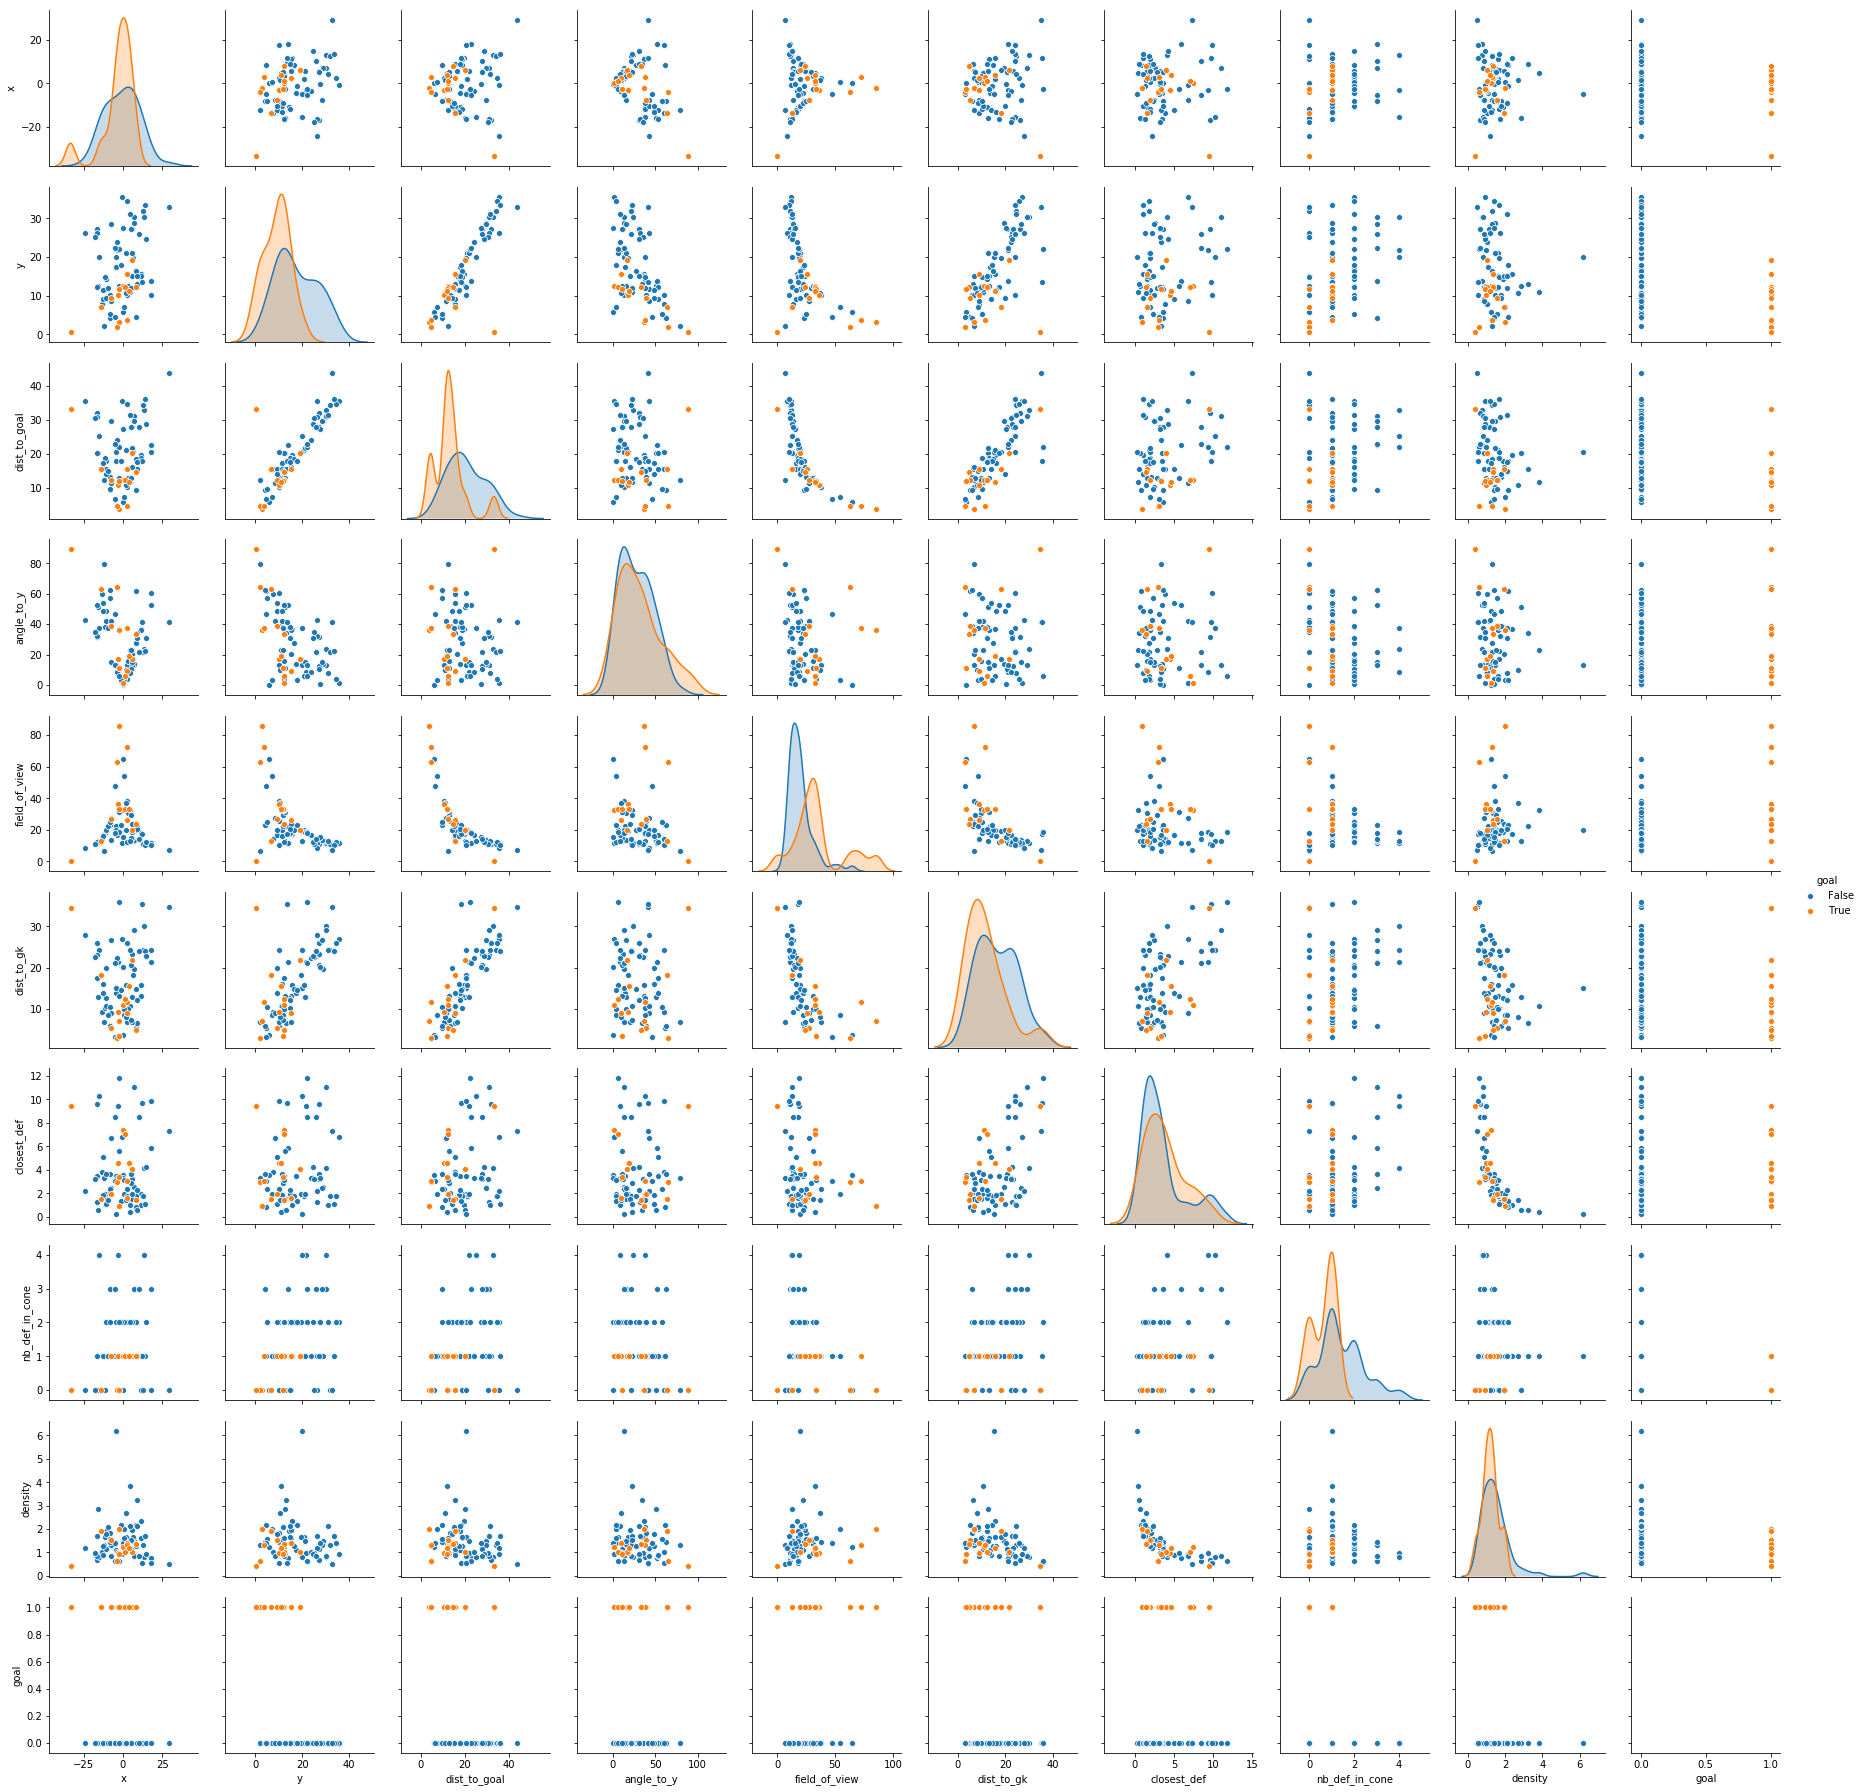

In [204]:
sns.pairplot(xg_data.iloc[:,8:18],hue='goal')

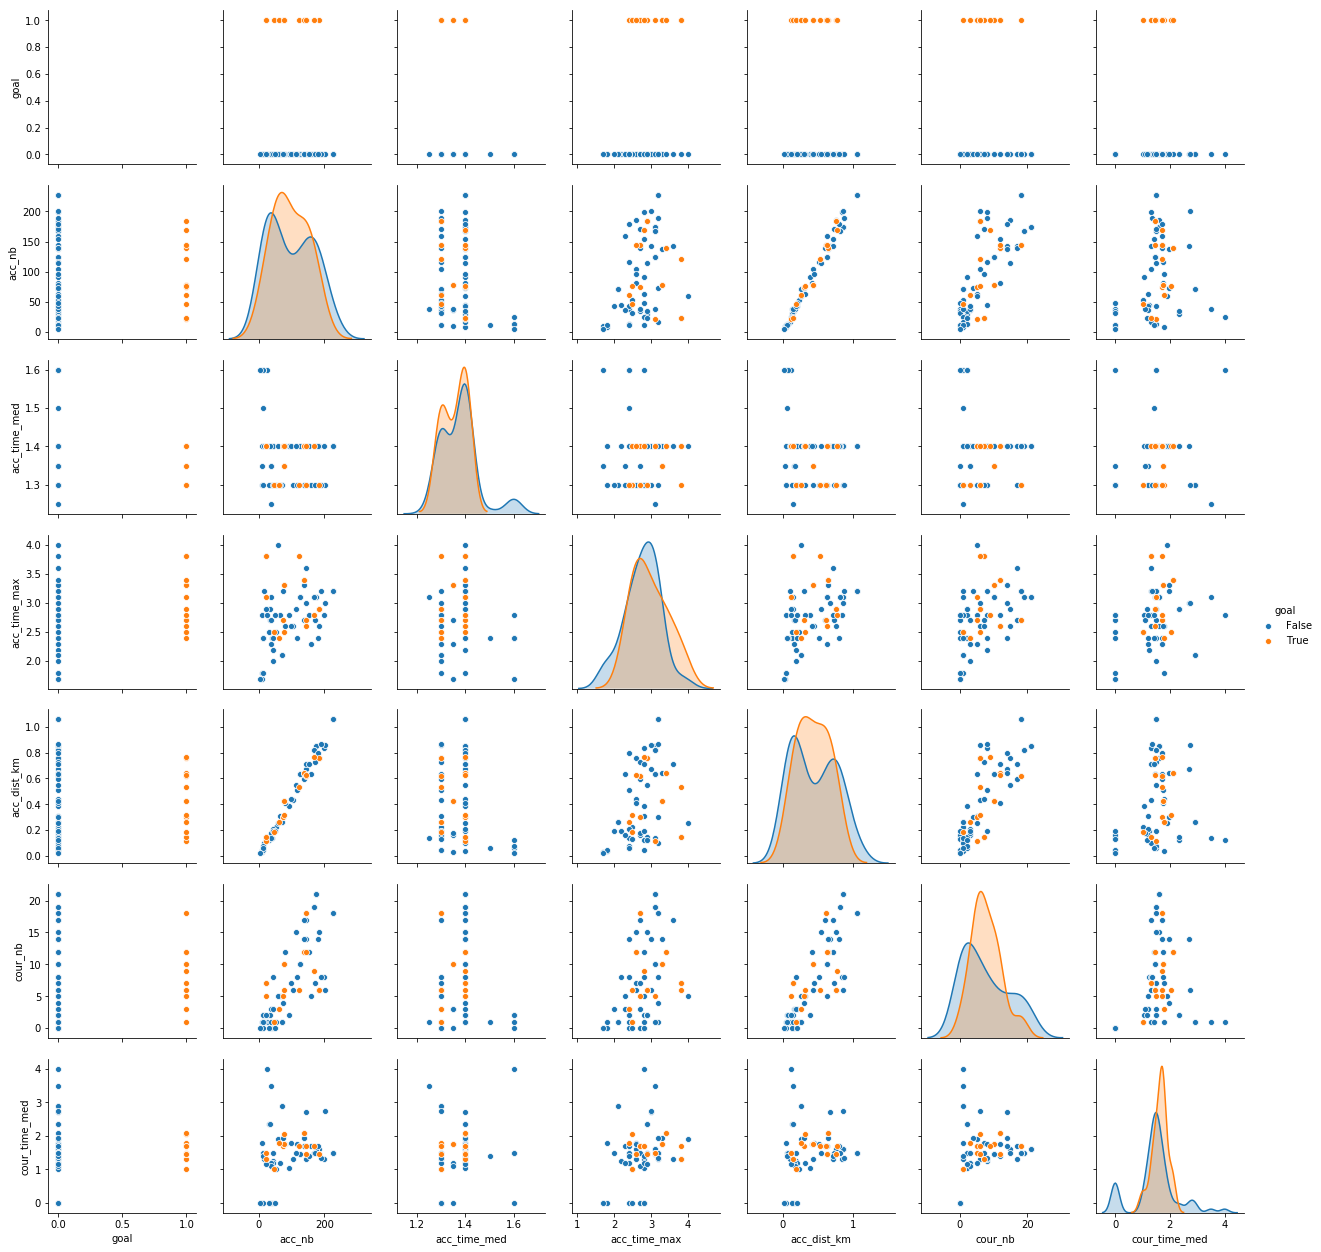

In [205]:
sns.pairplot(xg_data.iloc[:,17:28],hue='goal')

## On fait une ACP.

In [25]:
var_expl = xg_data.iloc[:,8:28].drop(columns='goal')

In [6]:
sc = StandardScaler()
norm = sc.fit_transform(var_expl)
pca = PCA()
coord = pca.fit_transform(norm)
print("Done")

Done


Text(0.5,0,'Factor number')

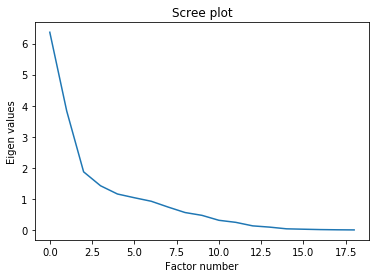

In [7]:
eigval = (79-1)/79*pca.explained_variance_
plt.plot(pca.explained_variance_)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")

Text(0.5,0,'Factor number')

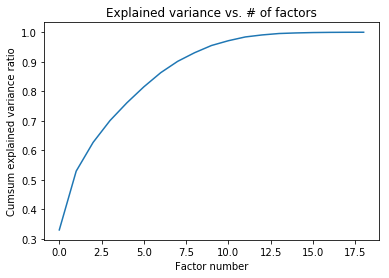

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")

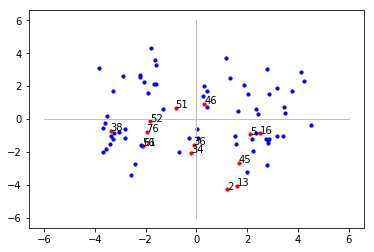

In [9]:
for i in range(79):
    if (xg_data['goal'].loc[i]== True):
        plt.scatter(coord[i,0],coord[i,1],s=10, color='red')
        plt.annotate(var_expl.index[i],(coord[i,0],coord[i,1]))
    if (xg_data['goal'].loc[i]== False):
        plt.scatter(coord[i,0],coord[i,1],s=10, color='blue')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

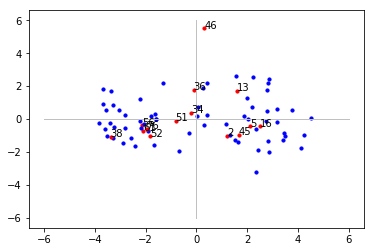

In [10]:
for i in range(79):
    if (xg_data['goal'].loc[i]== True):
        plt.scatter(coord[i,0],coord[i,2],s=10, color='red')
        plt.annotate(var_expl.index[i],(coord[i,0],coord[i,2]))
    if (xg_data['goal'].loc[i]== False):
        plt.scatter(coord[i,0],coord[i,2],s=10, color='blue')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

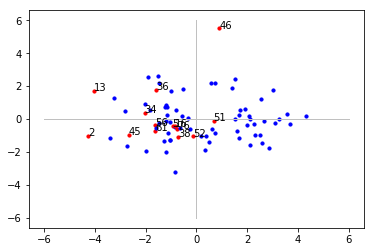

In [11]:
for i in range(79):
    if (xg_data['goal'].loc[i]== True):
        plt.scatter(coord[i,1],coord[i,2],s=10, color='red')
        plt.annotate(var_expl.index[i],(coord[i,1],coord[i,2]))
    if (xg_data['goal'].loc[i]== False):
        plt.scatter(coord[i,1],coord[i,2],s=10, color='blue')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

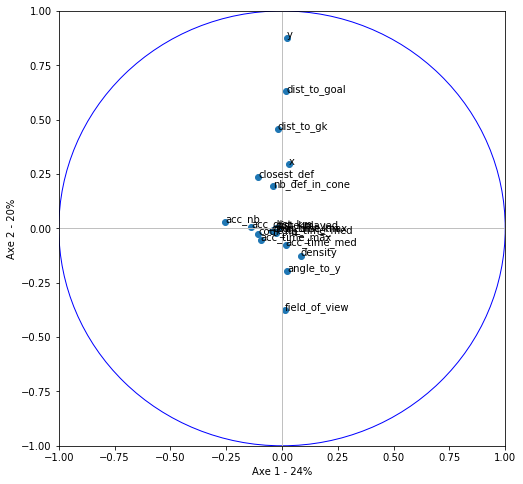

In [21]:
corvar = np.zeros((19,19))
for k in range(19):
    corvar[:,k] = pca.components_[k,:] * np.sqrt(eigval)

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(19):
    plt.annotate(var_expl.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.scatter(corvar[:,0],corvar[:,1])
cercle = plt.Circle((0,0),1,color='blue',fill=False)
plt.ylabel("Axe 2 - 20%")
plt.xlabel("Axe 1 - 24%")
axes.add_artist(cercle)

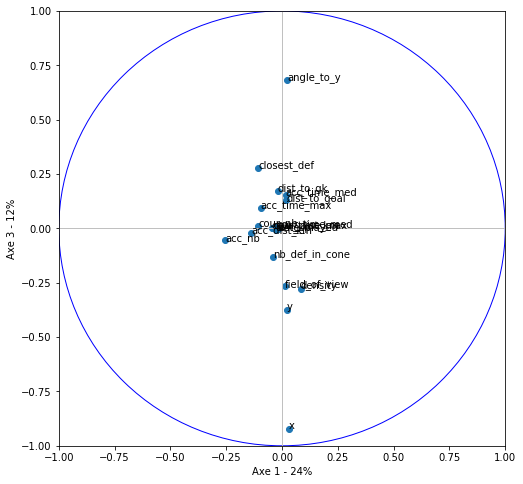

In [22]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(19):
    plt.annotate(var_expl.columns[j],(corvar[j,0],corvar[j,2]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.scatter(corvar[:,0],corvar[:,2])
cercle = plt.Circle((0,0),1,color='blue',fill=False)
plt.ylabel("Axe 3 - 12%")
plt.xlabel("Axe 1 - 24%")
axes.add_artist(cercle)

In [14]:
cos2var = corvar**2
ctrvar = cos2var
for k in range(19):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
pd.DataFrame({'id':var_expl.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2]})

id     CTR_1         CTR_2         CTR_3
0                x  0.000138  2.286405e-02  4.617337e-01
1                y  0.000084  2.032540e-01  7.649819e-02
2     dist_to_goal  0.000060  1.049902e-01  8.901363e-03
3       angle_to_y  0.000076  1.023056e-02  2.527443e-01
4    field_of_view  0.000025  3.731618e-02  3.859672e-02
5       dist_to_gk  0.000060  5.558550e-02  1.575560e-02
6      closest_def  0.001841  1.481840e-02  4.166413e-02
7   nb_def_in_cone  0.000256  9.860058e-03  9.131813e-03
8          density  0.001139  4.211183e-03  4.181513e-02
9           acc_nb  0.010433  2.177533e-04  1.670490e-03
10    acc_time_med  0.000041  1.535840e-03  1.287549e-02
11    acc_time_max  0.001434  7.710509e-04  4.831607e-03
12     acc_dist_km  0.003022  1.445121e-05  2.373409e-04
13         cour_nb  0.001833  1.486659e-04  5.840722e-05
14   cour_time_med  0.000105  1.291387e-04  2.818571e-05
15   cour_time_max  0.000342  4.601037e-05  4.677600e-07
16    cour_dist_km  0.000246  2.361223e-05  7.705417e-06
17         dist_km  0.000134  3.633600e-06  2.935918e-05
18     time_played  0.000046  6.619965e-07  1.165870e-05

## Création des indices 

In [3]:
var_expl = xg_data.iloc[:,8:28].drop(columns='goal')
target = xg_data['goal']
#### On crée notre liste d'indices
list_indices = np.empty(shape=[100,20])
i = 0
while i < 100:
    indice = random.sample(range(0,79),20)
    nb_1 = sum(target[indice])
    if nb_1 > 2:
        list_indices[i] = indice
        i = i+1
    else :
        i = i

## On fait une GLM.

In [42]:
def glm_mean(indices):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = target[indices]
    train_target = target.drop(index = indices)
    logreg = LogisticRegression()
    logreg = logreg.fit(X=train, y=train_target)
    prediction = logreg.predict_proba(test)
    return(metrics.roc_auc_score(test_target, prediction[:,1]))

In [34]:
np.mean(np.apply_along_axis(func1d = glm_mean, axis = 1, arr = list_indices))

0.686603106819651

In [4]:
glm_fit = sm.GLM(exog=var_expl, endog=xg_data['goal'], family=sm.families.Binomial())
glm_fit = glm_fit.fit()
print(glm_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   goal   No. Observations:                   79
Model:                            GLM   Df Residuals:                       60
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.934
Date:                Mon, 18 Mar 2019   Deviance:                       29.869
Time:                        10:42:05   Pearson chi2:                     30.6
No. Iterations:                    10   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
x                  0.3237      0.169      1.920      0.055      -0.007       0.654
y                 -1.9102      0.821    

Text(0.5,0,'Répartition des p-values')

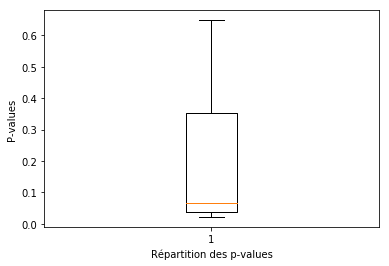

In [23]:
plt.boxplot(glm_fit.pvalues)
plt.ylabel("P-values")
plt.xlabel("Répartition des p-values")

Text(0.5,0,'Répartition des coefficients')

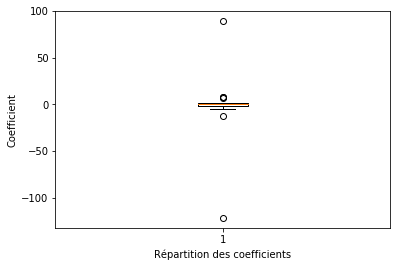

In [27]:
plt.boxplot(glm_fit.params)
plt.ylabel("Coefficient")
plt.xlabel("Répartition des coefficients")

## On fait des GLM de la variable goal sur chaque variable.

In [5]:
beta = np.empty(shape=19)
pval = np.empty(shape=19)
for i in range(0,19):
    glm = sm.GLM(exog=var_expl.iloc[:,i], endog=target, family=sm.families.Binomial())
    glm = glm.fit()
    beta[i] = glm.params[0]
    pval[i] = glm.pvalues[0]
mat_glm = pd.DataFrame({'beta':beta,'pval':pval})
mat_glm.index = var_expl.columns
mat_glm

beta          pval
x               -0.043394  6.122116e-02
y               -0.122615  8.915468e-07
dist_to_gk      -0.104915  1.513598e-06
dist_to_goal    -0.096117  3.860547e-07
field_of_view   -0.032861  1.838270e-03
x_abs           -0.172033  1.728314e-05
angle_to_y      -0.036349  8.040469e-05
nb_def_in_cone  -1.467369  4.056693e-06
closest_def     -0.301037  1.415198e-04
density         -1.127780  1.191942e-06
acc_nb          -0.015377  2.336298e-05
acc_time_med    -1.116941  1.879130e-07
acc_time_max    -0.514495  7.164937e-07
acc_dist_km     -3.402228  2.636467e-05
cour_nb         -0.176765  1.162928e-04
cour_time_med   -0.825084  6.748362e-06
cour_time_max   -0.371259  6.123789e-05
cour_dist_km   -10.493298  2.521477e-04
dist_km         -0.255426  2.661259e-05

Text(0.5,0,'Répartition des p-values')

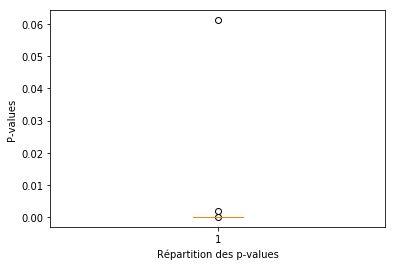

In [121]:
plt.boxplot(mat_glm.pval)
plt.ylabel("P-values")
plt.xlabel("Répartition des p-values")

Text(0.5,0,'Répartition des coefficients')

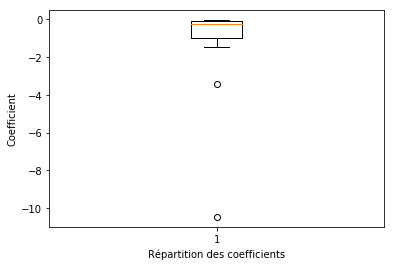

In [29]:
plt.boxplot(mat_glm.beta)
plt.ylabel("Coefficient")
plt.xlabel("Répartition des coefficients")

## RIDGE

In [43]:
def ridge_mean(indices):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = target[indices]
    train_target = target.drop(index = indices)
    ridge = LogisticRegressionCV(Cs=100,cv=5,penalty="l2",scoring="roc_auc",solver="lbfgs",class_weight="balanced",
                                 n_jobs=-1,refit=True, random_state=13)
    ridge = ridge.fit(train, train_target)
    prediction = ridge.predict_proba(test)
    return(metrics.roc_auc_score(test_target, prediction[:,1]))

In [45]:
np.mean(np.apply_along_axis(func1d = ridge_mean, axis = 1, arr = list_indices))

0.6609290171837966

In [6]:
ridge = LogisticRegressionCV(Cs=100,cv=5,penalty="l2",scoring="roc_auc",solver="lbfgs",class_weight="balanced",
                                 n_jobs=-1,refit=True, random_state=13)
ridge = ridge.fit(var_expl, target)

In [18]:
pd.DataFrame({'coef':pd.Series(var_expl.columns), 'val':pd.Series(ridge.coef_[0])})

coef       val
0                x  0.021976
1                y -0.445460
2       dist_to_gk  0.016270
3     dist_to_goal  0.238259
4    field_of_view  0.011503
5            x_abs -0.172699
6       angle_to_y -0.047453
7   nb_def_in_cone -0.983797
8      closest_def -0.156552
9          density -1.026308
10          acc_nb -0.016162
11    acc_time_med -0.050072
12    acc_time_max  0.998636
13     acc_dist_km -0.007542
14         cour_nb -0.131206
15   cour_time_med -0.173962
16   cour_time_max  0.430902
17    cour_dist_km -0.006398
18         dist_km  0.282786

## LASSO

In [48]:
def lasso_mean(indices):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = target[indices]
    train_target = target.drop(index = indices)
    lasso = LogisticRegressionCV(Cs=100, cv=5, penalty="l1", scoring="roc_auc", solver="liblinear",
    class_weight="balanced", n_jobs=-1,refit=True,random_state=13)
    lasso = lasso.fit(train, train_target)
    prediction = lasso.predict_proba(test)
    return(metrics.roc_auc_score(test_target, prediction[:,1]))

In [49]:
np.mean(np.apply_along_axis(func1d = lasso_mean, axis = 1, arr = list_indices))

0.6754797060170223

In [21]:
lasso = LogisticRegressionCV(Cs=100, cv=5, penalty="l1", scoring="roc_auc", solver="liblinear",
    class_weight="balanced", n_jobs=-1,refit=True,random_state=13)
lasso = lasso.fit(var_expl, target)

In [22]:
pd.DataFrame({'coef':pd.Series(var_expl.columns), 'val':pd.Series(lasso.coef_[0])})

coef       val
0                x  0.000000
1                y -0.048411
2       dist_to_gk  0.000000
3     dist_to_goal  0.000000
4    field_of_view  0.025050
5            x_abs  0.000000
6       angle_to_y  0.000000
7   nb_def_in_cone  0.000000
8      closest_def  0.000000
9          density  0.000000
10          acc_nb  0.000000
11    acc_time_med  0.000000
12    acc_time_max  0.000000
13     acc_dist_km  0.000000
14         cour_nb  0.000000
15   cour_time_med  0.000000
16   cour_time_max  0.000000
17    cour_dist_km  0.000000
18         dist_km  0.000000

## Elastic Net

In [188]:
param_grid = {"alpha": np.arange(5, 6, 0.01),
              "l1_ratio": [0,0.01,0.05,0.1,0.015,0.2]}
    
elnet = ElasticNet()
elnet_grid = GridSearchCV(elnet, param_grid=param_grid, cv=5, scoring="roc_auc")
elnet_grid = elnet_grid.fit(var_expl, target)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

In [189]:
elnet_grid.best_params_ #{'alpha': 5.64, 'l1_ratio': 0.1}

{'alpha': 5.639999999999986, 'l1_ratio': 0.01}

In [195]:
def elnet_mean(indices):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = target[indices]
    train_target = target.drop(index = indices)
    elnet = ElasticNet(alpha=5.64, l1_ratio=0.1)
    elnet = elnet.fit(train, train_target)
    prediction = elnet.predict(test)
    return(metrics.roc_auc_score(test_target, prediction))

In [196]:
np.mean(np.apply_along_axis(func1d = elnet_mean, axis = 1, arr = list_indices))

0.7004908007433742

## Forêt aléatoire

In [59]:
def rf_mean(indices,nb_arbre,depth,split,leaf, features):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = target[indices]
    train_target = target.drop(index = indices)
    forest = RandomForestClassifier(n_estimators=nb_arbre, criterion='gini', max_depth=depth, min_samples_split=split, min_samples_leaf=leaf,
                                max_features=features, max_leaf_nodes=None,bootstrap=True, oob_score=True)
    forest = forest.fit(train, train_target)
    y_chap = forest.predict_proba(test)
    return(metrics.roc_auc_score(test_target, y_chap[:,1])) 

In [93]:
auc_grille = pd.DataFrame({'split' : [0.01,0.05,0.1,0.15,0.2,0.25,0.3],
                          'leaf' : [0.05,0.1,0.15,0.2,0.25,0.30,1],
                          'auc' : [0, 0, 0, 0, 0, 0, 0]})
auc_grille = auc_grille.pivot("split", "leaf", "auc")
split = [0.01,0.05,0.1,0.15,0.2,0.25,0.3]
leaf = [0.05,0.1,0.15,0.2,0.25,0.30,1]
for i in range(0,7):
    for j in range(0,7):
        auc = np.apply_along_axis(func1d = rf_mean, axis = 1, arr = indices, nb_arbre = 40, depth = None, split = split[i], leaf =leaf[j])
        auc_grille.iloc[i,j] = np.mean(auc)

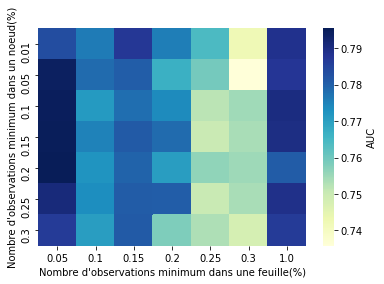

In [159]:
ax = sns.heatmap(auc_grille, cmap="YlGnBu",cbar_kws={'label': 'AUC'}) #0.2, 0.05
ax.set(xlabel="Nombre d'observations minimum dans une feuille(%)", ylabel="Nombre d'observations minimum dans un noeud(%)")
plt.show()

In [74]:
auc_tot = np.empty(shape=0)
nb_arbre = [1,2,4,6,8,10,15,20,25,30,35,40,50,70,75,100,125,150,200,300]
for nb in nb_arbre:
    auc = np.apply_along_axis(func1d = rf_mean, axis = 1, arr = list_indices, nb_arbre = nb, depth = 15, split = 0.2, leaf = 2, features =0.1)
    auc_tot = np.append(auc_tot,np.mean(auc))  

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estim

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


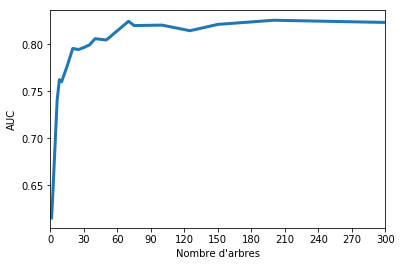

In [106]:
res = pd.DataFrame({'auc' : auc_tot, 'ntrees' : [1,2,4,6,8,10,15,20,25,30,35,40,50,70,75,100,125,150,200,300]})
ax = res.plot(x="ntrees", y="auc", legend=False)
ax.set(xlabel="Nombre d'arbres", ylabel='AUC')
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 3})
ticks = np.arange(0, 301, 30)
plt.xticks(ticks)
plt.show()

In [55]:
param_grid = {"max_depth": [10,13,14,15,16,17,30, None],
              "max_features": [0.1, 0.3, 0.5,0.7,0.9],
              "min_samples_split": [0.1,0.2,0.3,0.4,0.5],
              "min_samples_leaf": [1,2,3,4,5]}
forest = RandomForestClassifier(n_estimators=50)
grid_search = GridSearchCV(forest, param_grid=param_grid, cv=5, scoring="roc_auc")
grid_search = grid_search.fit(var_expl, target)

In [58]:
grid_search.best_params_ #'max_depth': 15,'max_features': 0.1,'min_samples_leaf': 2,'min_samples_split': 0.2

{'max_depth': 15,
 'max_features': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 0.3}

In [91]:
np.mean(np.apply_along_axis(func1d = rf_mean, axis = 1, arr = list_indices, nb_arbre = 200, depth = 15, split = 0.2, leaf = 2, features=0.1))

0.8250150856496444

In [108]:
forest = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=15, min_samples_split=0.2, min_samples_leaf=2,
                                max_features=0.1, max_leaf_nodes=None,bootstrap=True, oob_score=True)
forest = forest.fit(var_expl, target)
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = var_expl.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
field_of_view     0.106608
y                 0.099425
dist_to_goal      0.085196
dist_to_gk        0.081575
acc_time_max      0.053988
cour_time_med     0.053721
acc_dist_km       0.052120
x_abs             0.050697
dist_km           0.049190
angle_to_y        0.044248
density           0.041785
cour_nb           0.041752
x                 0.040689
cour_time_max     0.040052
cour_dist_km      0.039239
nb_def_in_cone    0.038319
acc_nb            0.036212
closest_def       0.032770
acc_time_med      0.012414

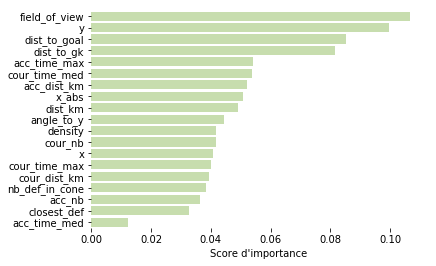

In [122]:
varimp = pd.DataFrame({'importance' : feature_importances.importance, 'variable' : feature_importances.index})
bar = sns.barplot(x= 'importance', y='variable', data = varimp, color='#C7E5A6')
bar.set(ylabel="",xlabel="Score d'importance")
sns.despine(left=True, bottom=True)

## Réseau de neurones

In [2]:
def build_NN():
    model = Sequential()
    model.add(Dense(8, activation='linear', input_shape= (19,)))
    model.add(Dense(16, activation='linear'))
    model.add(Dense(32, activation='linear'))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=RMSprop(lr=0.001), metrics=["accuracy"])
    return model

def nn_mean(indices):
    test = var_expl.iloc[indices,:]
    train = var_expl.drop(index = indices)
    test_target = to_categorical(target[indices])
    train_target = to_categorical(target.drop(index = indices))
    model = build_NN()
    model.fit(x=train, y=train_target, batch_size=16, epochs=50)
    prediction = model.predict(test)
    return(metrics.roc_auc_score(test_target, prediction))

In [208]:
param_grid = {"activation": ['relu','softmax','linear','sigmoid'],
              "optimizer": ['Adam','rmsprop','SGD']}
nn = KerasClassifier(build_fn=build_NN)
nn_grid = GridSearchCV(nn, param_grid=param_grid, cv=5, scoring="roc_auc")
nn_grid = nn_grid.fit(var_expl, target) #{'activation': 'linear', 'optimizer': 'rmsprop'}

Epoch 1/1
63/63 [==============================] - 5s 76ms/step - loss: 4.8671 - acc: 0.4444
Epoch 1/1
63/63 [==============================] - 5s 74ms/step - loss: 9.7735 - acc: 0.2222
Epoch 1/1
63/63 [==============================] - 4s 71ms/step - loss: 11.3849 - acc: 0.1270
Epoch 1/1
63/63 [==============================] - 5s 76ms/step - loss: 3.0903 - acc: 0.5714
Epoch 1/1
64/64 [==============================] - 4s 66ms/step - loss: 2.1796 - acc: 0.7656
Epoch 1/1
63/63 [==============================] - 4s 71ms/step - loss: 3.5303 - acc: 0.5556
Epoch 1/1
63/63 [==============================] - 4s 66ms/step - loss: 12.3828 - acc: 0.2063
Epoch 1/1
63/63 [==============================] - 5s 87ms/step - loss: 12.8132 - acc: 0.1587
Epoch 1/1
63/63 [==============================] - 5s 83ms/step - loss: 9.1007 - acc: 0.3333
Epoch 1/1
64/64 [==============================] - 5s 72ms/step - loss: 3.2740 - acc: 0.7969
Epoch 1/1
63/63 [==============================] - 5s 78ms/step - l

In [217]:
param_grid = {"lr": [0.001, 0.01, 0.1, 0.2, 0.3],
              "rho": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]}
nn = KerasClassifier(build_fn=build_NN)
nn_grid = GridSearchCV(nn, param_grid=param_grid, cv=5, scoring="roc_auc")
nn_grid = nn_grid.fit(var_expl, target) #{'lr': 0.001, 'rho': 0.0}

Epoch 1/1
63/63 [==============================] - 8s 129ms/step - loss: 11.3993 - acc: 0.2063
Epoch 1/1
63/63 [==============================] - 7s 113ms/step - loss: 11.6556 - acc: 0.2381
Epoch 1/1
63/63 [==============================] - 7s 111ms/step - loss: 3.3494 - acc: 0.7143
Epoch 1/1
63/63 [==============================] - 7s 114ms/step - loss: 3.3688 - acc: 0.7460
Epoch 1/1
64/64 [==============================] - 7s 107ms/step - loss: 12.5974 - acc: 0.2031
Epoch 1/1
63/63 [==============================] - 7s 112ms/step - loss: 10.8144 - acc: 0.1905
Epoch 1/1
63/63 [==============================] - 7s 108ms/step - loss: 1.4125 - acc: 0.7619
Epoch 1/1
63/63 [==============================] - 7s 109ms/step - loss: 9.5695 - acc: 0.3016
Epoch 1/1
63/63 [==============================] - 8s 120ms/step - loss: 6.0217 - acc: 0.5079
Epoch 1/1
64/64 [==============================] - 8s 119ms/step - loss: 5.9667 - acc: 0.2188
Epoch 1/1
63/63 [==============================] - 7s 11

In [221]:
param_grid = {"nb_neurones": [5,10,20,30,40,50]}
nn = KerasClassifier(build_fn=build_NN)
nn_grid = GridSearchCV(nn, param_grid=param_grid, cv=5, scoring="roc_auc")
nn_grid = nn_grid.fit(var_expl, target)

Epoch 1/1
63/63 [==============================] - 20s 319ms/step - loss: 5.7196 - acc: 0.5238
Epoch 1/1
63/63 [==============================] - 17s 277ms/step - loss: 9.8729 - acc: 0.2222
Epoch 1/1
63/63 [==============================] - 18s 281ms/step - loss: 5.7408 - acc: 0.5556
Epoch 1/1
63/63 [==============================] - 17s 263ms/step - loss: 2.4834 - acc: 0.8254
Epoch 1/1
64/64 [==============================] - 17s 261ms/step - loss: 2.8187 - acc: 0.7656
Epoch 1/1
63/63 [==============================] - 17s 274ms/step - loss: 7.0037 - acc: 0.4921
Epoch 1/1
63/63 [==============================] - 16s 259ms/step - loss: 3.7495 - acc: 0.5873
Epoch 1/1
63/63 [==============================] - 17s 264ms/step - loss: 2.2311 - acc: 0.8571
Epoch 1/1
63/63 [==============================] - 16s 260ms/step - loss: 1.7139 - acc: 0.6190
Epoch 1/1
64/64 [==============================] - 17s 271ms/step - loss: 3.2440 - acc: 0.7969
Epoch 1/1
63/63 [==============================] -

In [224]:
nn_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0d94a66550>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'nb_neurones': [5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)>

In [226]:
param_grid = {"batch_size": [8,16,32]}
nn = KerasClassifier(build_fn=build_NN)
nn_grid = GridSearchCV(nn, param_grid=param_grid, cv=5, scoring="roc_auc")
nn_grid = nn_grid.fit(var_expl, target)

Epoch 1/1
63/63 [==============================] - 20s 322ms/step - loss: 3.0591 - acc: 0.7143
Epoch 1/1
63/63 [==============================] - 20s 323ms/step - loss: 3.3282 - acc: 0.7937
Epoch 1/1
63/63 [==============================] - 21s 332ms/step - loss: 2.2169 - acc: 0.8571
Epoch 1/1
63/63 [==============================] - 20s 313ms/step - loss: 11.0345 - acc: 0.2222
Epoch 1/1
64/64 [==============================] - 19s 297ms/step - loss: 8.2157 - acc: 0.3281
Epoch 1/1
63/63 [==============================] - 20s 311ms/step - loss: 13.3038 - acc: 0.1746
Epoch 1/1
63/63 [==============================] - 20s 319ms/step - loss: 6.9573 - acc: 0.3810
Epoch 1/1
63/63 [==============================] - 20s 317ms/step - loss: 1.5573 - acc: 0.7778
Epoch 1/1
63/63 [==============================] - 19s 301ms/step - loss: 1.8462 - acc: 0.7143
Epoch 1/1
64/64 [==============================] - 19s 291ms/step - loss: 7.1630 - acc: 0.3750
Epoch 1/1
63/63 [==============================]

In [246]:
param_grid = {"epochs": [5,10,20]}
nn = KerasClassifier(build_fn=build_NN)
nn_grid = GridSearchCV(nn, param_grid=param_grid, cv=5, scoring="roc_auc")
nn_grid = nn_grid.fit(var_expl, target)

Epoch 1/5
63/63 [==============================] - 24s 385ms/step - loss: 9.6642 - acc: 0.2222
Epoch 2/5
63/63 [==============================] - 0s 194us/step - loss: 1.9690 - acc: 0.6190
Epoch 3/5
63/63 [==============================] - 0s 169us/step - loss: 2.2532 - acc: 0.8095
Epoch 4/5
63/63 [==============================] - 0s 296us/step - loss: 1.5462 - acc: 0.7619
Epoch 5/5
63/63 [==============================] - 0s 306us/step - loss: 1.4965 - acc: 0.7302
Epoch 1/5
63/63 [==============================] - 20s 313ms/step - loss: 9.9307 - acc: 0.2381
Epoch 2/5
63/63 [==============================] - 0s 254us/step - loss: 6.0244 - acc: 0.4603
Epoch 3/5
63/63 [==============================] - 0s 222us/step - loss: 2.2537 - acc: 0.7619
Epoch 4/5
63/63 [==============================] - 0s 184us/step - loss: 2.1651 - acc: 0.7302
Epoch 5/5
63/63 [==============================] - 0s 212us/step - loss: 2.0596 - acc: 0.6984
Epoch 1/5
63/63 [==============================] - 21s 332

64/64 [==============================] - 0s 155us/step - loss: 1.4031 - acc: 0.7812
Epoch 18/20
64/64 [==============================] - 0s 131us/step - loss: 1.0374 - acc: 0.7500
Epoch 19/20
64/64 [==============================] - 0s 148us/step - loss: 1.3670 - acc: 0.7344
Epoch 20/20
64/64 [==============================] - 0s 129us/step - loss: 0.8465 - acc: 0.7812
Epoch 1/20
79/79 [==============================] - 21s 270ms/step - loss: 3.5455 - acc: 0.6709
Epoch 2/20
79/79 [==============================] - 0s 226us/step - loss: 2.9336 - acc: 0.7848
Epoch 3/20
79/79 [==============================] - 0s 172us/step - loss: 2.8909 - acc: 0.7975
Epoch 4/20
79/79 [==============================] - 0s 199us/step - loss: 2.8401 - acc: 0.7848
Epoch 5/20
79/79 [==============================] - 0s 198us/step - loss: 2.7995 - acc: 0.7975
Epoch 6/20
79/79 [==============================] - 0s 157us/step - loss: 2.6811 - acc: 0.7595
Epoch 7/20
79/79 [==============================] - 0s 16

In [5]:
np.mean(np.apply_along_axis(func1d = nn_mean, axis = 1, arr = list_indices))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
59/59 [==============================] - 0s 5ms/step - loss: 2.5825 - acc: 0.7627
Epoch 2/50
59/59 [==============================] - 0s 134us/step - loss: 1.7832 - acc: 0.7797
Epoch 3/50
59/59 [==============================] - 0s 139us/step - loss: 1.2268 - acc: 0.7966
Epoch 4/50
59/59 [==============================] - 0s 133us/step - loss: 0.7732 - acc: 0.7966
Epoch 5/50
59/59 [==============================] - 0s 79us/step - loss: 0.5388 - acc: 0.7966
Epoch 6/50
59/59 [==============================] - 0s 77us/step - loss: 1.0780 - acc: 0.7119
Epoch 7/50
59/59 [==============================] - 0s 91us/step - loss: 0.8035 - acc: 0.8644
Epoch 8/50
59/59 [==============================] - 0s 88us/step - loss: 0.7695 - acc: 0.7288
Epoch 9/50
59/59 [==============================] - 0s 83us/step - loss: 0.6449 - acc: 0.8475
Epoch 10/50
59/59 [=============

59/59 [==============================] - 0s 83us/step - loss: 0.3525 - acc: 0.8475
Epoch 32/50
59/59 [==============================] - 0s 122us/step - loss: 0.3702 - acc: 0.8644
Epoch 33/50
59/59 [==============================] - 0s 93us/step - loss: 0.5119 - acc: 0.8136
Epoch 34/50
59/59 [==============================] - 0s 84us/step - loss: 0.5663 - acc: 0.8305
Epoch 35/50
59/59 [==============================] - 0s 85us/step - loss: 0.3748 - acc: 0.8814
Epoch 36/50
59/59 [==============================] - 0s 105us/step - loss: 0.7314 - acc: 0.7966
Epoch 37/50
59/59 [==============================] - 0s 90us/step - loss: 0.5845 - acc: 0.8644
Epoch 38/50
59/59 [==============================] - 0s 131us/step - loss: 0.4983 - acc: 0.8475
Epoch 39/50
59/59 [==============================] - 0s 102us/step - loss: 0.3578 - acc: 0.9153
Epoch 40/50
59/59 [==============================] - 0s 98us/step - loss: 0.3894 - acc: 0.8475
Epoch 41/50
59/59 [==============================] - 0s 12

59/59 [==============================] - 0s 109us/step - loss: 2.3074 - acc: 0.7966
Epoch 3/50
59/59 [==============================] - 0s 100us/step - loss: 2.2671 - acc: 0.8136
Epoch 4/50
59/59 [==============================] - 0s 81us/step - loss: 2.2581 - acc: 0.8475
Epoch 5/50
59/59 [==============================] - 0s 96us/step - loss: 2.2449 - acc: 0.8305
Epoch 6/50
59/59 [==============================] - 0s 123us/step - loss: 2.2408 - acc: 0.8305
Epoch 7/50
59/59 [==============================] - 0s 84us/step - loss: 2.2399 - acc: 0.8475
Epoch 8/50
59/59 [==============================] - 0s 78us/step - loss: 2.2609 - acc: 0.8136
Epoch 9/50
59/59 [==============================] - 0s 85us/step - loss: 2.2308 - acc: 0.8475
Epoch 10/50
59/59 [==============================] - 0s 94us/step - loss: 2.2760 - acc: 0.7966
Epoch 11/50
59/59 [==============================] - 0s 102us/step - loss: 2.2470 - acc: 0.8305
Epoch 12/50
59/59 [==============================] - 0s 115us/ste

59/59 [==============================] - 0s 126us/step - loss: 2.1070 - acc: 0.8475
Epoch 25/50
59/59 [==============================] - 0s 100us/step - loss: 2.2410 - acc: 0.8136
Epoch 26/50
59/59 [==============================] - 0s 105us/step - loss: 2.0232 - acc: 0.8644
Epoch 27/50
59/59 [==============================] - 0s 86us/step - loss: 2.1916 - acc: 0.8475
Epoch 28/50
59/59 [==============================] - 0s 107us/step - loss: 2.0547 - acc: 0.8305
Epoch 29/50
59/59 [==============================] - 0s 93us/step - loss: 1.9712 - acc: 0.8475
Epoch 30/50
59/59 [==============================] - 0s 134us/step - loss: 2.0790 - acc: 0.8305
Epoch 31/50
59/59 [==============================] - 0s 106us/step - loss: 2.0342 - acc: 0.8475
Epoch 32/50
59/59 [==============================] - 0s 136us/step - loss: 2.0179 - acc: 0.8475
Epoch 33/50
59/59 [==============================] - 0s 93us/step - loss: 2.1196 - acc: 0.8305
Epoch 34/50
59/59 [==============================] - 0s

59/59 [==============================] - 0s 164us/step - loss: 0.6641 - acc: 0.7797
Epoch 45/50
59/59 [==============================] - 0s 101us/step - loss: 0.4629 - acc: 0.7797
Epoch 46/50
59/59 [==============================] - 0s 106us/step - loss: 0.6314 - acc: 0.8136
Epoch 47/50
59/59 [==============================] - 0s 88us/step - loss: 0.4169 - acc: 0.8305
Epoch 48/50
59/59 [==============================] - 0s 96us/step - loss: 0.7497 - acc: 0.7966
Epoch 49/50
59/59 [==============================] - 0s 82us/step - loss: 0.4428 - acc: 0.7966
Epoch 50/50
59/59 [==============================] - 0s 97us/step - loss: 0.4186 - acc: 0.8475
Epoch 1/50
59/59 [==============================] - 1s 10ms/step - loss: 2.4940 - acc: 0.8136
Epoch 2/50
59/59 [==============================] - 0s 120us/step - loss: 1.5170 - acc: 0.7797
Epoch 3/50
59/59 [==============================] - 0s 89us/step - loss: 0.9908 - acc: 0.7966
Epoch 4/50
59/59 [==============================] - 0s 119us/

59/59 [==============================] - 0s 94us/step - loss: 0.7697 - acc: 0.8644
Epoch 31/50
59/59 [==============================] - 0s 96us/step - loss: 0.5963 - acc: 0.8814
Epoch 32/50
59/59 [==============================] - 0s 134us/step - loss: 0.6133 - acc: 0.8983
Epoch 33/50
59/59 [==============================] - 0s 115us/step - loss: 0.6188 - acc: 0.8475
Epoch 34/50
59/59 [==============================] - 0s 89us/step - loss: 0.6222 - acc: 0.8475
Epoch 35/50
59/59 [==============================] - 0s 110us/step - loss: 1.2554 - acc: 0.7797
Epoch 36/50
59/59 [==============================] - 0s 205us/step - loss: 0.7282 - acc: 0.8475
Epoch 37/50
59/59 [==============================] - 0s 140us/step - loss: 0.6329 - acc: 0.8644
Epoch 38/50
59/59 [==============================] - 0s 84us/step - loss: 1.0536 - acc: 0.7966
Epoch 39/50
59/59 [==============================] - 0s 81us/step - loss: 0.5517 - acc: 0.8814
Epoch 40/50
59/59 [==============================] - 0s 8

Epoch 2/50
59/59 [==============================] - 0s 96us/step - loss: 1.7677 - acc: 0.7288
Epoch 3/50
59/59 [==============================] - 0s 120us/step - loss: 1.3489 - acc: 0.8475
Epoch 4/50
59/59 [==============================] - 0s 127us/step - loss: 0.9266 - acc: 0.8305
Epoch 5/50
59/59 [==============================] - 0s 100us/step - loss: 0.6183 - acc: 0.8305
Epoch 6/50
59/59 [==============================] - 0s 116us/step - loss: 0.7237 - acc: 0.7627
Epoch 7/50
59/59 [==============================] - 0s 95us/step - loss: 0.6672 - acc: 0.8475
Epoch 8/50
59/59 [==============================] - 0s 97us/step - loss: 0.5774 - acc: 0.8814
Epoch 9/50
59/59 [==============================] - 0s 89us/step - loss: 0.5547 - acc: 0.8475
Epoch 10/50
59/59 [==============================] - 0s 99us/step - loss: 0.6909 - acc: 0.7966
Epoch 11/50
59/59 [==============================] - 0s 95us/step - loss: 0.6252 - acc: 0.8644
Epoch 12/50
59/59 [==============================] - 0

59/59 [==============================] - 0s 99us/step - loss: 0.4496 - acc: 0.8644
Epoch 24/50
59/59 [==============================] - 0s 92us/step - loss: 0.3422 - acc: 0.8983
Epoch 25/50
59/59 [==============================] - 0s 101us/step - loss: 0.3716 - acc: 0.8644
Epoch 26/50
59/59 [==============================] - 0s 134us/step - loss: 0.8151 - acc: 0.7288
Epoch 27/50
59/59 [==============================] - 0s 116us/step - loss: 0.3180 - acc: 0.8644
Epoch 28/50
59/59 [==============================] - 0s 103us/step - loss: 0.4059 - acc: 0.7966
Epoch 29/50
59/59 [==============================] - 0s 144us/step - loss: 0.4943 - acc: 0.8644
Epoch 30/50
59/59 [==============================] - 0s 155us/step - loss: 0.3173 - acc: 0.8814
Epoch 31/50
59/59 [==============================] - 0s 108us/step - loss: 0.4411 - acc: 0.8475
Epoch 32/50
59/59 [==============================] - 0s 105us/step - loss: 0.3228 - acc: 0.8644
Epoch 33/50
59/59 [==============================] - 0

59/59 [==============================] - 0s 98us/step - loss: 0.5797 - acc: 0.7797
Epoch 44/50
59/59 [==============================] - 0s 132us/step - loss: 0.4011 - acc: 0.8644
Epoch 45/50
59/59 [==============================] - 0s 97us/step - loss: 0.8692 - acc: 0.6780
Epoch 46/50
59/59 [==============================] - 0s 117us/step - loss: 1.0253 - acc: 0.7288
Epoch 47/50
59/59 [==============================] - 0s 104us/step - loss: 0.4860 - acc: 0.8305
Epoch 48/50
59/59 [==============================] - 0s 110us/step - loss: 0.5224 - acc: 0.7966
Epoch 49/50
59/59 [==============================] - 0s 228us/step - loss: 0.5961 - acc: 0.7966
Epoch 50/50
59/59 [==============================] - 0s 108us/step - loss: 0.3943 - acc: 0.8644
Epoch 1/50
59/59 [==============================] - 1s 18ms/step - loss: 4.7239 - acc: 0.5593
Epoch 2/50
59/59 [==============================] - 0s 147us/step - loss: 3.0512 - acc: 0.7797
Epoch 3/50
59/59 [==============================] - 0s 10

Epoch 13/50
59/59 [==============================] - 0s 99us/step - loss: 2.7319 - acc: 0.8305
Epoch 14/50
59/59 [==============================] - 0s 106us/step - loss: 2.7319 - acc: 0.8305
Epoch 15/50
59/59 [==============================] - 0s 106us/step - loss: 2.7319 - acc: 0.8305
Epoch 16/50
59/59 [==============================] - 0s 141us/step - loss: 2.7319 - acc: 0.8305
Epoch 17/50
59/59 [==============================] - 0s 103us/step - loss: 2.7319 - acc: 0.8305
Epoch 18/50
59/59 [==============================] - 0s 95us/step - loss: 2.7319 - acc: 0.8305
Epoch 19/50
59/59 [==============================] - 0s 109us/step - loss: 2.7319 - acc: 0.8305
Epoch 20/50
59/59 [==============================] - 0s 93us/step - loss: 2.7319 - acc: 0.8305
Epoch 21/50
59/59 [==============================] - 0s 114us/step - loss: 2.7319 - acc: 0.8305
Epoch 22/50
59/59 [==============================] - 0s 110us/step - loss: 2.7319 - acc: 0.8305
Epoch 23/50
59/59 [========================

59/59 [==============================] - 0s 122us/step - loss: 2.4587 - acc: 0.8475
Epoch 34/50
59/59 [==============================] - 0s 102us/step - loss: 2.4587 - acc: 0.8475
Epoch 35/50
59/59 [==============================] - 0s 93us/step - loss: 2.4587 - acc: 0.8475
Epoch 36/50
59/59 [==============================] - 0s 118us/step - loss: 2.4587 - acc: 0.8475
Epoch 37/50
59/59 [==============================] - 0s 129us/step - loss: 2.4587 - acc: 0.8475
Epoch 38/50
59/59 [==============================] - 0s 124us/step - loss: 2.4587 - acc: 0.8475
Epoch 39/50
59/59 [==============================] - 0s 112us/step - loss: 2.4587 - acc: 0.8475
Epoch 40/50
59/59 [==============================] - 0s 110us/step - loss: 2.4587 - acc: 0.8475
Epoch 41/50
59/59 [==============================] - 0s 107us/step - loss: 2.4587 - acc: 0.8475
Epoch 42/50
59/59 [==============================] - 0s 99us/step - loss: 2.4587 - acc: 0.8475
Epoch 43/50
59/59 [==============================] - 0

Epoch 4/50
59/59 [==============================] - 0s 104us/step - loss: 0.7654 - acc: 0.8475
Epoch 5/50
59/59 [==============================] - 0s 102us/step - loss: 0.6387 - acc: 0.7627
Epoch 6/50
59/59 [==============================] - 0s 105us/step - loss: 0.6086 - acc: 0.7458
Epoch 7/50
59/59 [==============================] - 0s 105us/step - loss: 0.6591 - acc: 0.7797
Epoch 8/50
59/59 [==============================] - 0s 104us/step - loss: 0.6027 - acc: 0.8136
Epoch 9/50
59/59 [==============================] - 0s 121us/step - loss: 0.4499 - acc: 0.7966
Epoch 10/50
59/59 [==============================] - 0s 114us/step - loss: 0.6049 - acc: 0.8305
Epoch 11/50
59/59 [==============================] - 0s 99us/step - loss: 0.5872 - acc: 0.7966
Epoch 12/50
59/59 [==============================] - 0s 94us/step - loss: 0.5490 - acc: 0.8305
Epoch 13/50
59/59 [==============================] - 0s 104us/step - loss: 0.5885 - acc: 0.7627
Epoch 14/50
59/59 [=============================

59/59 [==============================] - 0s 93us/step - loss: 0.7230 - acc: 0.8136
Epoch 25/50
59/59 [==============================] - 0s 101us/step - loss: 0.9770 - acc: 0.7627
Epoch 26/50
59/59 [==============================] - 0s 101us/step - loss: 0.8812 - acc: 0.7797
Epoch 27/50
59/59 [==============================] - 0s 114us/step - loss: 0.6342 - acc: 0.7797
Epoch 28/50
59/59 [==============================] - 0s 109us/step - loss: 1.0870 - acc: 0.6780
Epoch 29/50
59/59 [==============================] - 0s 89us/step - loss: 0.6188 - acc: 0.7966
Epoch 30/50
59/59 [==============================] - 0s 104us/step - loss: 0.5262 - acc: 0.8475
Epoch 31/50
59/59 [==============================] - 0s 92us/step - loss: 0.5654 - acc: 0.8136
Epoch 32/50
59/59 [==============================] - 0s 102us/step - loss: 0.6612 - acc: 0.7288
Epoch 33/50
59/59 [==============================] - 0s 101us/step - loss: 0.6655 - acc: 0.8136
Epoch 34/50
59/59 [==============================] - 0s

59/59 [==============================] - 0s 102us/step - loss: 0.4692 - acc: 0.8136
Epoch 45/50
59/59 [==============================] - 0s 99us/step - loss: 0.4581 - acc: 0.8475
Epoch 46/50
59/59 [==============================] - 0s 98us/step - loss: 0.3955 - acc: 0.8644
Epoch 47/50
59/59 [==============================] - 0s 113us/step - loss: 0.3673 - acc: 0.8136
Epoch 48/50
59/59 [==============================] - 0s 99us/step - loss: 0.5127 - acc: 0.7966
Epoch 49/50
59/59 [==============================] - 0s 106us/step - loss: 0.3548 - acc: 0.8644
Epoch 50/50
59/59 [==============================] - 0s 102us/step - loss: 0.4114 - acc: 0.7966
Epoch 1/50
59/59 [==============================] - 2s 29ms/step - loss: 5.9216 - acc: 0.5763
Epoch 2/50
59/59 [==============================] - 0s 111us/step - loss: 2.6346 - acc: 0.7966
Epoch 3/50
59/59 [==============================] - 0s 99us/step - loss: 2.5222 - acc: 0.7458
Epoch 4/50
59/59 [==============================] - 0s 119us

59/59 [==============================] - 0s 102us/step - loss: 2.0444 - acc: 0.8475
Epoch 15/50
59/59 [==============================] - 0s 105us/step - loss: 2.0571 - acc: 0.8305
Epoch 16/50
59/59 [==============================] - 0s 107us/step - loss: 1.9546 - acc: 0.8475
Epoch 17/50
59/59 [==============================] - 0s 103us/step - loss: 2.0029 - acc: 0.8475
Epoch 18/50
59/59 [==============================] - 0s 109us/step - loss: 1.9791 - acc: 0.8475
Epoch 19/50
59/59 [==============================] - 0s 115us/step - loss: 1.9858 - acc: 0.8644
Epoch 20/50
59/59 [==============================] - 0s 100us/step - loss: 2.0238 - acc: 0.8475
Epoch 21/50
59/59 [==============================] - 0s 106us/step - loss: 2.0236 - acc: 0.8475
Epoch 22/50
59/59 [==============================] - 0s 121us/step - loss: 1.9778 - acc: 0.8475
Epoch 23/50
59/59 [==============================] - 0s 112us/step - loss: 1.9896 - acc: 0.8475
Epoch 24/50
59/59 [==============================] -

59/59 [==============================] - 0s 110us/step - loss: 0.4620 - acc: 0.8136
Epoch 35/50
59/59 [==============================] - 0s 111us/step - loss: 0.6280 - acc: 0.7458
Epoch 36/50
59/59 [==============================] - 0s 113us/step - loss: 0.7361 - acc: 0.7119
Epoch 37/50
59/59 [==============================] - 0s 114us/step - loss: 0.4587 - acc: 0.8136
Epoch 38/50
59/59 [==============================] - 0s 118us/step - loss: 0.4426 - acc: 0.8136
Epoch 39/50
59/59 [==============================] - 0s 104us/step - loss: 0.5450 - acc: 0.7797
Epoch 40/50
59/59 [==============================] - 0s 108us/step - loss: 0.7020 - acc: 0.7797
Epoch 41/50
59/59 [==============================] - 0s 113us/step - loss: 0.4429 - acc: 0.7966
Epoch 42/50
59/59 [==============================] - 0s 114us/step - loss: 0.5488 - acc: 0.7458
Epoch 43/50
59/59 [==============================] - 0s 106us/step - loss: 0.6576 - acc: 0.8305
Epoch 44/50
59/59 [==============================] -

59/59 [==============================] - 0s 129us/step - loss: 2.4587 - acc: 0.8475
Epoch 5/50
59/59 [==============================] - 0s 121us/step - loss: 2.4587 - acc: 0.8475
Epoch 6/50
59/59 [==============================] - 0s 111us/step - loss: 2.4587 - acc: 0.8475
Epoch 7/50
59/59 [==============================] - 0s 110us/step - loss: 2.4587 - acc: 0.8475
Epoch 8/50
59/59 [==============================] - 0s 110us/step - loss: 2.4587 - acc: 0.8475
Epoch 9/50
59/59 [==============================] - 0s 122us/step - loss: 2.4587 - acc: 0.8475
Epoch 10/50
59/59 [==============================] - 0s 119us/step - loss: 2.4587 - acc: 0.8475
Epoch 11/50
59/59 [==============================] - 0s 100us/step - loss: 2.4587 - acc: 0.8475
Epoch 12/50
59/59 [==============================] - 0s 112us/step - loss: 2.4587 - acc: 0.8475
Epoch 13/50
59/59 [==============================] - 0s 112us/step - loss: 2.4587 - acc: 0.8475
Epoch 14/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 112us/step - loss: 0.6501 - acc: 0.7288
Epoch 25/50
59/59 [==============================] - 0s 111us/step - loss: 0.5364 - acc: 0.7797
Epoch 26/50
59/59 [==============================] - 0s 122us/step - loss: 0.4428 - acc: 0.8305
Epoch 27/50
59/59 [==============================] - 0s 111us/step - loss: 0.7237 - acc: 0.7627
Epoch 28/50
59/59 [==============================] - 0s 109us/step - loss: 0.4565 - acc: 0.8136
Epoch 29/50
59/59 [==============================] - 0s 116us/step - loss: 0.5833 - acc: 0.7288
Epoch 30/50
59/59 [==============================] - 0s 108us/step - loss: 0.4506 - acc: 0.8136
Epoch 31/50
59/59 [==============================] - 0s 123us/step - loss: 0.6000 - acc: 0.7288
Epoch 32/50
59/59 [==============================] - 0s 121us/step - loss: 0.4132 - acc: 0.8305
Epoch 33/50
59/59 [==============================] - 0s 109us/step - loss: 0.4764 - acc: 0.8136
Epoch 34/50
59/59 [==============================] -

59/59 [==============================] - 0s 119us/step - loss: 0.7330 - acc: 0.7966
Epoch 45/50
59/59 [==============================] - 0s 121us/step - loss: 0.4337 - acc: 0.8305
Epoch 46/50
59/59 [==============================] - 0s 117us/step - loss: 0.4278 - acc: 0.7797
Epoch 47/50
59/59 [==============================] - 0s 122us/step - loss: 0.5645 - acc: 0.8644
Epoch 48/50
59/59 [==============================] - 0s 118us/step - loss: 0.5039 - acc: 0.8305
Epoch 49/50
59/59 [==============================] - 0s 117us/step - loss: 0.3685 - acc: 0.8305
Epoch 50/50
59/59 [==============================] - 0s 118us/step - loss: 0.4251 - acc: 0.8136
Epoch 1/50
59/59 [==============================] - 2s 41ms/step - loss: 5.7609 - acc: 0.5424
Epoch 2/50
59/59 [==============================] - 0s 115us/step - loss: 4.8585 - acc: 0.6610
Epoch 3/50
59/59 [==============================] - 0s 111us/step - loss: 4.1373 - acc: 0.6949
Epoch 4/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 119us/step - loss: 2.7319 - acc: 0.8305
Epoch 15/50
59/59 [==============================] - 0s 109us/step - loss: 2.7319 - acc: 0.8305
Epoch 16/50
59/59 [==============================] - 0s 110us/step - loss: 2.7319 - acc: 0.8305
Epoch 17/50
59/59 [==============================] - 0s 114us/step - loss: 2.7319 - acc: 0.8305
Epoch 18/50
59/59 [==============================] - 0s 119us/step - loss: 2.7319 - acc: 0.8305
Epoch 19/50
59/59 [==============================] - 0s 110us/step - loss: 2.7319 - acc: 0.8305
Epoch 20/50
59/59 [==============================] - 0s 113us/step - loss: 2.7319 - acc: 0.8305
Epoch 21/50
59/59 [==============================] - 0s 119us/step - loss: 2.7319 - acc: 0.8305
Epoch 22/50
59/59 [==============================] - 0s 115us/step - loss: 2.7319 - acc: 0.8305
Epoch 23/50
59/59 [==============================] - 0s 120us/step - loss: 2.7319 - acc: 0.8305
Epoch 24/50
59/59 [==============================] -

59/59 [==============================] - 0s 135us/step - loss: 0.3836 - acc: 0.8814
Epoch 35/50
59/59 [==============================] - 0s 132us/step - loss: 0.4027 - acc: 0.8814
Epoch 36/50
59/59 [==============================] - 0s 135us/step - loss: 0.4112 - acc: 0.7966
Epoch 37/50
59/59 [==============================] - 0s 123us/step - loss: 0.5423 - acc: 0.8644
Epoch 38/50
59/59 [==============================] - 0s 124us/step - loss: 0.3838 - acc: 0.8814
Epoch 39/50
59/59 [==============================] - 0s 122us/step - loss: 0.5318 - acc: 0.8136
Epoch 40/50
59/59 [==============================] - 0s 129us/step - loss: 0.5294 - acc: 0.8475
Epoch 41/50
59/59 [==============================] - 0s 117us/step - loss: 0.4113 - acc: 0.8305
Epoch 42/50
59/59 [==============================] - 0s 121us/step - loss: 0.4043 - acc: 0.8814
Epoch 43/50
59/59 [==============================] - 0s 131us/step - loss: 0.8587 - acc: 0.7627
Epoch 44/50
59/59 [==============================] -

59/59 [==============================] - 0s 124us/step - loss: 2.1855 - acc: 0.8644
Epoch 5/50
59/59 [==============================] - 0s 134us/step - loss: 2.1855 - acc: 0.8644
Epoch 6/50
59/59 [==============================] - 0s 135us/step - loss: 2.1855 - acc: 0.8644
Epoch 7/50
59/59 [==============================] - 0s 121us/step - loss: 2.1855 - acc: 0.8644
Epoch 8/50
59/59 [==============================] - 0s 120us/step - loss: 2.1855 - acc: 0.8644
Epoch 9/50
59/59 [==============================] - 0s 130us/step - loss: 2.1855 - acc: 0.8644
Epoch 10/50
59/59 [==============================] - 0s 137us/step - loss: 2.1855 - acc: 0.8644
Epoch 11/50
59/59 [==============================] - 0s 130us/step - loss: 2.1855 - acc: 0.8644
Epoch 12/50
59/59 [==============================] - 0s 114us/step - loss: 2.1855 - acc: 0.8644
Epoch 13/50
59/59 [==============================] - 0s 122us/step - loss: 2.1855 - acc: 0.8644
Epoch 14/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 128us/step - loss: 0.9384 - acc: 0.7458
Epoch 25/50
59/59 [==============================] - 0s 130us/step - loss: 0.5820 - acc: 0.7797
Epoch 26/50
59/59 [==============================] - 0s 143us/step - loss: 0.7565 - acc: 0.7627
Epoch 27/50
59/59 [==============================] - 0s 141us/step - loss: 0.6285 - acc: 0.7966
Epoch 28/50
59/59 [==============================] - 0s 138us/step - loss: 0.5440 - acc: 0.7458
Epoch 29/50
59/59 [==============================] - 0s 141us/step - loss: 0.9048 - acc: 0.6780
Epoch 30/50
59/59 [==============================] - 0s 149us/step - loss: 0.5938 - acc: 0.8305
Epoch 31/50
59/59 [==============================] - 0s 150us/step - loss: 0.5114 - acc: 0.8305
Epoch 32/50
59/59 [==============================] - 0s 130us/step - loss: 0.8683 - acc: 0.6780
Epoch 33/50
59/59 [==============================] - 0s 128us/step - loss: 0.5274 - acc: 0.7797
Epoch 34/50
59/59 [==============================] -

59/59 [==============================] - 0s 128us/step - loss: 0.5126 - acc: 0.8644
Epoch 45/50
59/59 [==============================] - 0s 139us/step - loss: 0.4051 - acc: 0.8644
Epoch 46/50
59/59 [==============================] - 0s 134us/step - loss: 0.5464 - acc: 0.7966
Epoch 47/50
59/59 [==============================] - 0s 134us/step - loss: 1.0106 - acc: 0.7288
Epoch 48/50
59/59 [==============================] - 0s 144us/step - loss: 0.6091 - acc: 0.7797
Epoch 49/50
59/59 [==============================] - 0s 139us/step - loss: 0.3431 - acc: 0.8644
Epoch 50/50
59/59 [==============================] - 0s 144us/step - loss: 0.4152 - acc: 0.8983
Epoch 1/50
59/59 [==============================] - 3s 55ms/step - loss: 2.9332 - acc: 0.6610
Epoch 2/50
59/59 [==============================] - 0s 134us/step - loss: 1.9884 - acc: 0.6610
Epoch 3/50
59/59 [==============================] - 0s 138us/step - loss: 1.3247 - acc: 0.7627
Epoch 4/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 134us/step - loss: 2.4589 - acc: 0.8475
Epoch 15/50
59/59 [==============================] - 0s 140us/step - loss: 2.4589 - acc: 0.8475
Epoch 16/50
59/59 [==============================] - 0s 123us/step - loss: 2.4589 - acc: 0.8475
Epoch 17/50
59/59 [==============================] - 0s 127us/step - loss: 2.4589 - acc: 0.8475
Epoch 18/50
59/59 [==============================] - 0s 126us/step - loss: 2.4589 - acc: 0.8475
Epoch 19/50
59/59 [==============================] - 0s 142us/step - loss: 2.4589 - acc: 0.8475
Epoch 20/50
59/59 [==============================] - 0s 122us/step - loss: 2.4589 - acc: 0.8475
Epoch 21/50
59/59 [==============================] - 0s 121us/step - loss: 2.4589 - acc: 0.8475
Epoch 22/50
59/59 [==============================] - 0s 135us/step - loss: 2.4588 - acc: 0.8475
Epoch 23/50
59/59 [==============================] - 0s 128us/step - loss: 2.4588 - acc: 0.8475
Epoch 24/50
59/59 [==============================] -

59/59 [==============================] - 0s 130us/step - loss: 13.1130 - acc: 0.1864
Epoch 35/50
59/59 [==============================] - 0s 142us/step - loss: 13.1130 - acc: 0.1864
Epoch 36/50
59/59 [==============================] - 0s 149us/step - loss: 13.1130 - acc: 0.1864
Epoch 37/50
59/59 [==============================] - 0s 144us/step - loss: 13.1130 - acc: 0.1864
Epoch 38/50
59/59 [==============================] - 0s 136us/step - loss: 13.1130 - acc: 0.1864
Epoch 39/50
59/59 [==============================] - 0s 147us/step - loss: 13.1130 - acc: 0.1864
Epoch 40/50
59/59 [==============================] - 0s 136us/step - loss: 13.1130 - acc: 0.1864
Epoch 41/50
59/59 [==============================] - 0s 142us/step - loss: 13.1130 - acc: 0.1864
Epoch 42/50
59/59 [==============================] - 0s 135us/step - loss: 13.1130 - acc: 0.1864
Epoch 43/50
59/59 [==============================] - 0s 131us/step - loss: 13.1130 - acc: 0.1864
Epoch 44/50
59/59 [=======================

59/59 [==============================] - 0s 160us/step - loss: 1.2664 - acc: 0.7119
Epoch 5/50
59/59 [==============================] - 0s 145us/step - loss: 0.5371 - acc: 0.7797
Epoch 6/50
59/59 [==============================] - 0s 140us/step - loss: 0.5228 - acc: 0.8305
Epoch 7/50
59/59 [==============================] - 0s 130us/step - loss: 1.5937 - acc: 0.6441
Epoch 8/50
59/59 [==============================] - 0s 142us/step - loss: 0.5898 - acc: 0.8136
Epoch 9/50
59/59 [==============================] - 0s 150us/step - loss: 0.6632 - acc: 0.7288
Epoch 10/50
59/59 [==============================] - 0s 134us/step - loss: 0.6780 - acc: 0.8475
Epoch 11/50
59/59 [==============================] - 0s 132us/step - loss: 0.8905 - acc: 0.7119
Epoch 12/50
59/59 [==============================] - 0s 142us/step - loss: 0.4716 - acc: 0.8305
Epoch 13/50
59/59 [==============================] - 0s 140us/step - loss: 0.6039 - acc: 0.7797
Epoch 14/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 143us/step - loss: 0.4464 - acc: 0.8644
Epoch 25/50
59/59 [==============================] - 0s 139us/step - loss: 0.5660 - acc: 0.8475
Epoch 26/50
59/59 [==============================] - 0s 145us/step - loss: 0.6058 - acc: 0.8475
Epoch 27/50
59/59 [==============================] - 0s 143us/step - loss: 0.4381 - acc: 0.8475
Epoch 28/50
59/59 [==============================] - 0s 139us/step - loss: 0.5922 - acc: 0.8305
Epoch 29/50
59/59 [==============================] - 0s 155us/step - loss: 0.7611 - acc: 0.7627
Epoch 30/50
59/59 [==============================] - 0s 137us/step - loss: 0.5952 - acc: 0.8305
Epoch 31/50
59/59 [==============================] - 0s 150us/step - loss: 0.6114 - acc: 0.7458
Epoch 32/50
59/59 [==============================] - 0s 170us/step - loss: 0.4492 - acc: 0.8136
Epoch 33/50
59/59 [==============================] - 0s 173us/step - loss: 0.7077 - acc: 0.7797
Epoch 34/50
59/59 [==============================] -

59/59 [==============================] - 0s 152us/step - loss: 0.4385 - acc: 0.8305
Epoch 45/50
59/59 [==============================] - 0s 153us/step - loss: 0.5220 - acc: 0.7797
Epoch 46/50
59/59 [==============================] - 0s 149us/step - loss: 0.4824 - acc: 0.8644
Epoch 47/50
59/59 [==============================] - 0s 146us/step - loss: 0.5892 - acc: 0.7966
Epoch 48/50
59/59 [==============================] - 0s 146us/step - loss: 0.5549 - acc: 0.8305
Epoch 49/50
59/59 [==============================] - 0s 154us/step - loss: 0.6916 - acc: 0.7627
Epoch 50/50
59/59 [==============================] - 0s 159us/step - loss: 0.5754 - acc: 0.7627
Epoch 1/50
59/59 [==============================] - 5s 79ms/step - loss: 2.7319 - acc: 0.8305
Epoch 2/50
59/59 [==============================] - 0s 153us/step - loss: 2.6407 - acc: 0.8305
Epoch 3/50
59/59 [==============================] - 0s 154us/step - loss: 2.2384 - acc: 0.8475
Epoch 4/50
59/59 [==============================] - 0s 1

59/59 [==============================] - 0s 160us/step - loss: 0.4525 - acc: 0.8475
Epoch 15/50
59/59 [==============================] - 0s 166us/step - loss: 0.4379 - acc: 0.8305
Epoch 16/50
59/59 [==============================] - 0s 141us/step - loss: 0.8619 - acc: 0.7119
Epoch 17/50
59/59 [==============================] - 0s 161us/step - loss: 0.3969 - acc: 0.8305
Epoch 18/50
59/59 [==============================] - 0s 157us/step - loss: 0.4065 - acc: 0.8136
Epoch 19/50
59/59 [==============================] - 0s 157us/step - loss: 0.5565 - acc: 0.7966
Epoch 20/50
59/59 [==============================] - 0s 161us/step - loss: 0.5918 - acc: 0.8644
Epoch 21/50
59/59 [==============================] - 0s 162us/step - loss: 0.4353 - acc: 0.8136
Epoch 22/50
59/59 [==============================] - 0s 155us/step - loss: 0.4513 - acc: 0.8305
Epoch 23/50
59/59 [==============================] - 0s 151us/step - loss: 0.4705 - acc: 0.8305
Epoch 24/50
59/59 [==============================] -

59/59 [==============================] - 0s 140us/step - loss: 0.8041 - acc: 0.8644
Epoch 35/50
59/59 [==============================] - 0s 152us/step - loss: 0.5962 - acc: 0.7966
Epoch 36/50
59/59 [==============================] - 0s 145us/step - loss: 0.4121 - acc: 0.8475
Epoch 37/50
59/59 [==============================] - 0s 149us/step - loss: 0.5705 - acc: 0.7627
Epoch 38/50
59/59 [==============================] - 0s 154us/step - loss: 0.8410 - acc: 0.7627
Epoch 39/50
59/59 [==============================] - 0s 147us/step - loss: 0.4992 - acc: 0.8475
Epoch 40/50
59/59 [==============================] - 0s 152us/step - loss: 0.4352 - acc: 0.8305
Epoch 41/50
59/59 [==============================] - 0s 158us/step - loss: 0.7498 - acc: 0.7627
Epoch 42/50
59/59 [==============================] - 0s 152us/step - loss: 0.4909 - acc: 0.7966
Epoch 43/50
59/59 [==============================] - 0s 151us/step - loss: 0.8359 - acc: 0.7627
Epoch 44/50
59/59 [==============================] -

0.6179237724897652